# Projeto 13: Compressão de imagens  

# Etapa 1: Importação das biblitoecas

In [1]:
#%tensorflow_version 2.x
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import pandas as pd
import seaborn as sns
import pickle
import zipfile
import random
tf.__version__

'2.7.0-dev20210724'

# Etapa 2: Carregamento da base de dados

In [3]:
path = "../content/traffic-signs-data.zip"
zip_object = zipfile.ZipFile(file=path, mode="r")
zip_object.extractall("../content/")
zip_object.close()

In [5]:
with open("../content/traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("../content/traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("../content/traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [6]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

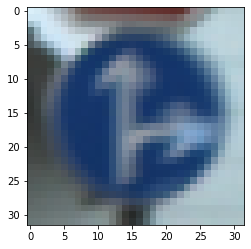

In [7]:
plt.imshow(X_train[1105])

# Etapa 3: Visualização dos dados

In [8]:
X_train.shape

(34799, 32, 32, 3)

In [9]:
X_test.shape

(12630, 32, 32, 3)

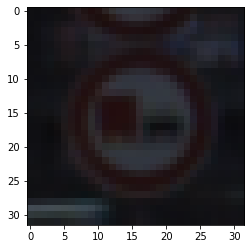

In [10]:
i = random.randint(1,34000) 
plt.imshow( X_train[i] , cmap = 'gray')

In [11]:
label = y_train[i]
label

10

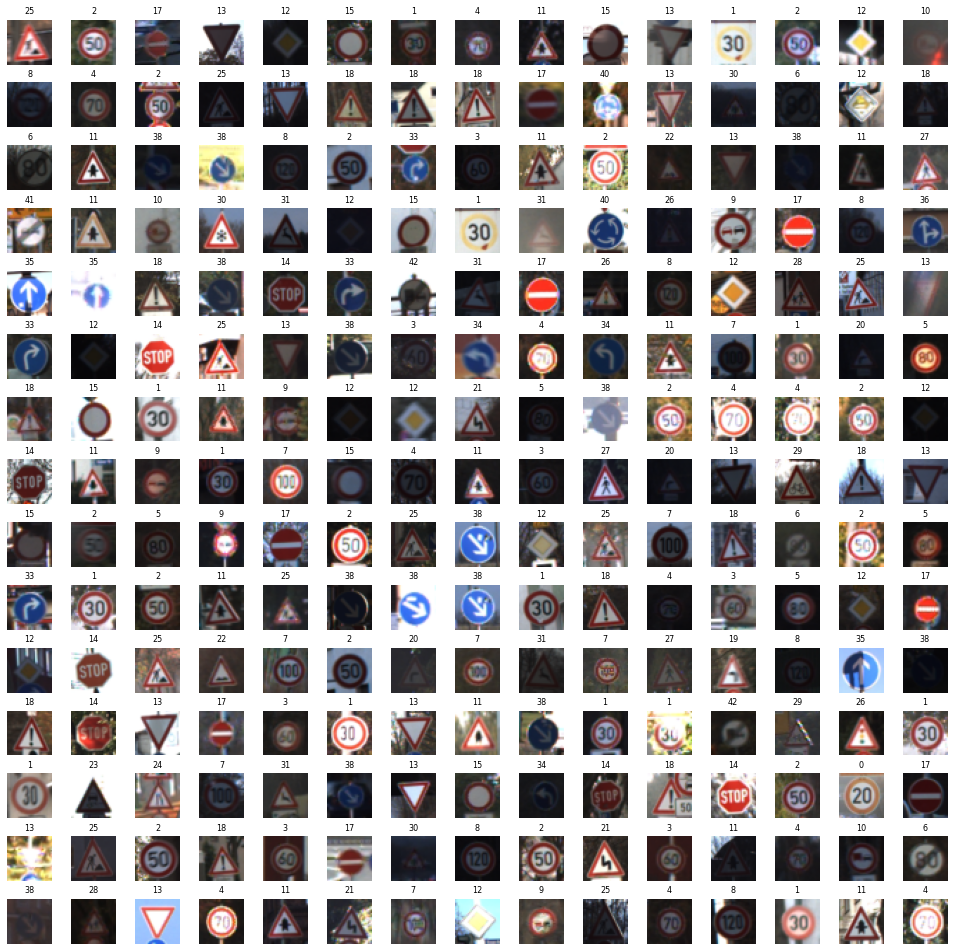

In [12]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel()
n_training = len(X_train)

for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow( X_train[index] )
    axes[i].set_title(y_train[index], fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

# Etapa 4: Pré-processamento

In [13]:
X_train = X_train / 255
X_test = X_test / 255

# Etapa 5: Criação e treinamento do autoencoder

In [14]:
autoencoder = tf.keras.models.Sequential()

# Encoder
autoencoder.add(tf.keras.layers.Conv2D(64, (3,3), strides=1, padding="same", input_shape=(32, 32, 3)))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.AveragePooling2D((2,2), padding="same"))

autoencoder.add(tf.keras.layers.Conv2D(32, (3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.AveragePooling2D((2,2), padding="same"))

autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))

# Encoded image (Code Layer)
autoencoder.add(tf.keras.layers.AveragePooling2D((2,2), padding="same")) 

# Decoder
autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.UpSampling2D((2, 2)))

autoencoder.add(tf.keras.layers.Conv2D(32, (3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.UpSampling2D((2, 2)))

autoencoder.add(tf.keras.layers.Conv2D(64, (3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.UpSampling2D((2, 2)))

autoencoder.add(tf.keras.layers.Conv2D(3, (3,3), strides=1, activation='sigmoid', padding="same"))

In [15]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01))
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization (BatchN  (None, 32, 32, 64)        256       
ormalization)                                                    
_________________________________________________________________
activation (Activation)      (None, 32, 32, 64)        0         
_________________________________________________________________
average_pooling2d (AverageP  (None, 16, 16, 64)        0         
ooling2D)                                                        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        18464     
_________________________________________________________________
batch_normalization_1 (Batc  (None, 16, 16, 32)        1

C:\Users\andre\anaconda3\envs\gpu\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [16]:
autoencoder.fit(X_train,          
          X_train, 
          epochs=20, 
          batch_size=200, 
          validation_data=(X_test, X_test))

Epoch 1/20
174/174 [==============================] - 7s 18ms/step - loss: 0.5052 - val_loss: 0.5171
Epoch 2/20
174/174 [==============================] - 2s 13ms/step - loss: 0.4861 - val_loss: 0.4873
Epoch 3/20
174/174 [==============================] - 2s 13ms/step - loss: 0.4818 - val_loss: 0.4806
Epoch 4/20
174/174 [==============================] - 2s 13ms/step - loss: 0.4793 - val_loss: 0.4778
Epoch 5/20
174/174 [==============================] - 2s 13ms/step - loss: 0.4774 - val_loss: 0.4841
Epoch 6/20
174/174 [==============================] - 2s 13ms/step - loss: 0.4757 - val_loss: 0.4798
Epoch 7/20
174/174 [==============================] - 2s 12ms/step - loss: 0.4741 - val_loss: 0.4775
Epoch 8/20
174/174 [==============================] - 2s 13ms/step - loss: 0.4724 - val_loss: 0.4858
Epoch 9/20
174/174 [==============================] - 2s 12ms/step - loss: 0.4715 - val_loss: 0.4782
Epoch 10/20
174/174 [==============================] - 2s 13ms/step - loss: 0.4708 - val_lo

# Etapa 6: Avaliação do modelo

In [17]:
predicted = autoencoder.predict(X_test[:10].reshape(-1, 32, 32, 3))

In [18]:
predicted.shape

(10, 32, 32, 3)

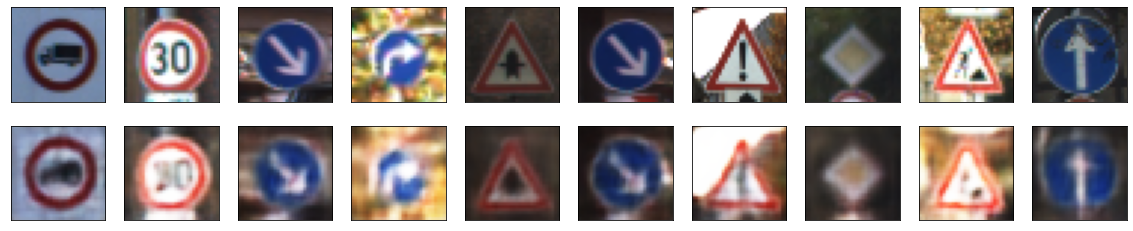

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([X_test[:10], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((32, 32, 3)))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)